# <b><u>INTRODUCTION</u></b>

## Instance Segmentation Problem 
- Instance Segmentation: Object detection + Sementic segmentation
    - Object detection: The goal is to classify individual objects and localize each using a bounding box.

    - Semantic segmentation: The goal is to classify each pixel into a fixed set of categories without differentiating object intances.
    
![](assets/Segmentation_Problems.png)  
- Classification: There is a balloon in this image.
- Semantic Segmentation: These are all the balloon pixels.
- Object Detection: There are 7 balloons in this image at these locations. We’re starting to account for objects that overlap.
- Instance Segmentation: There are 7 balloons at these locations, and these are the pixels that belong to each one.
    
    
## Why is it challenging?

Instance segmentation is challenging because it requires (1) <u>the correct detection of all objects</u> in an image while also (2) <u>precisely segmenting each instance</u>.

***
# <b><u>DATASET</u></b>

In our project, we select two datasets from different domains such as 'Bolt dataset' for infrastructure inspection and 'Historical Document Image Dataset' for article detection. Detail information of each dataset is described in below.

## Data description: Bolt dataset

In this project, total 80 photos ('bolt dataset' for future) taken from the bridge testbed at the structural lab in UNL are used to identify the bridge connection component and deficiency of the bridge. Each image is in JPG format and in RGB color space (3 channel), and the resolution of the image is either 4032x3024 or 3024x4032.


#### Class distribution
To motivate to find the connection component and deficiency of the bridge, the target object to classify from the image is 'bolt' and 'corrosion'. The target class is divided as either the image has bolt only, corrosion only, or has both bolt and corrosion. Following graph shows the distribution of the class of bolt dataset in training and validation set.

![](assets/bolt/bolt_distribution.png)  

#### Input and expected output
The following two images are example of the bolt dataset and an expected output (ground truth).

Input Image |    Ground-truth
:-------------------------|:-------------------------
<img src="assets/bolt/bolt_image_input.jpg" >  |  <img src="assets/bolt/bolt_image_output.png">



## Data description: Historical Document Image Dataset

In this project, as a dataset, a subset of images, 80 images, are carefully collected from the IMPACT Centre of Competence (https://www.primaresearch.org/datasets/IMPACT_Digitisation) that contains more than half a million representative text-based images complied by a number of major European libraries. Here, each image is in RGB color space (3 channel) and the size of each image varies but they are mostly around 4750x6550.

The following two images are example of the dataset and an expected prediction. Note that the input image contains noise that makes the segmentation task to be challenging.

Input Image            |  Ground-truth
-------------------------:|:-------------------------:
![](assets/document/document_image_input.png)  |  ![](assets/document/document_image_output.png)




***
# <b><u>MODEL SELECTION</u></b>

## Limitation of existing models

Traditional approaches don't apply neural networks and make heavy use of domain knowledge. The performance of segmentation is heavily dependent on the features engineering which will determin local and global feature (pixel color, Histogram of oriented gradient, scale-invariant feature transform, Bag-of-visual-words, dimensionality reduction)
- k-Nearest Neighbors
    - Good for low-dimensional data: Practically infeasible for feature engineering and to memorize the entire dataset
- Hidden Markov Model
    - Success of this tecnique is dependent on feature extraction and does not fit well with sequential characteristics since image data is spatial.
- Linear Regression
    - Image data is too complicate to be linearly separated
    - Mapping to higher dimensional space is inefficient
- Naïve Bayes
    - Strong independent assumption is not suitable to image data
- SVM
    - Not a good option for incremental learning.
    - Not efficient if the number of features are very huge.



## Neural Network: Mask R-CNN

Mask R-CNN is a computer vision model developed by the Facebook AI group that achieves state-of-the art results on instance segmentation task.

Following figure shows the brief flowchart of Mask R-CNN segmentation process. (Image available at http://blog.csdn.net)

![](assets/mrcnn_architecture.png)

- Performs rich feature extraction without involving feature engineering by human
    - Convolutional backbone for feature extraction
    - Shared with Region Proposal Network (RPN) and RoIAlign layer
- RPN and RoIAlgin layer
    - RPN proposes an expected box-shaped region of object which is keep trained through the extracted features
    - RoIAlign layer accepts the features of each Region of Interests (RoI) and align to fixed-sized feature map
- 3 Network head branches working simulataneously:
    - Mask prediction
    - Label classification 
    - Bounding box regression
- 3 Loss functions for each branches
    - Average cross-entropy loss of each RoI mask
    - log loss of class prediction
    - bounding box loss
    




***
# HYPERPARAMETER TUNING

Mask R-CNN model provides a lot of knobs to turn, including:

- Backbone
- <b>pre-trained weight</b>($^*$)
    - COCO
    - ImageNet
- Gradient Clip Norm
- <b>Learning rate</b>($^*$)
    - 0.01
    - 0.001
- Learning Momentum
- Weight decay
- <b>Early stopping</b>($^*$)


To optimize the model for each dataset, among the above listed parameters, we decided with to play with three bolded parameters that we have learned in the class.


***

# <b><u>Training Result and Analysis</u></b>


## Bolt dataset

The following graph shows the loss curve of training and validation set for each hyper-parameter setting. The dotted line shows the training loss while the solid line shows the validation loss.
![](assets/bolt/bolt_loss_curve_30.png)  

<font><b>- Observation 1: Training vs. Validation</b></font><br>
The trend of the training loss seems getting decreased while the one of the validation showing sharp fluctuation regardless of the hyper-parameters. Even the validation dataset decreased until epoch 10, it sharply fluctuate again to the hightest loss point and then decreasing again. In our knowledge, we guess that the dataset is overfitted to the training dataset.

<font><b>- Observation 2: Hyper-parameters</b></font><br>
learning rate: The validation loss was higher when the learning rate is set as 0.001 comparison to learning rate as 0.01. Also, when the learning rate is set as 0.01, it shows the epoch that the validation loss sharply fluctuate after decreasement (we guess this as local minima) is lower than when the learning rate is 0.001.
Pre-trained weights: If the pre-trained weights are set as 'imagenet', the validation loss slightly much fluctuates comparison to 'coco', although the degree was not significantly different. However, the starting loss seems affected by the pre-trained weights. We guess that as the varsity of classes in the COCO dataset(http://cocodataset.org/#home) is much larger than the ImageNet dataset(http://image-net.org/index), the ImageNet might be possible to overfit.

<font><b>- Observation 3: Early Stopping</b></font><br>
Based on the observation above, validation loss generally decreased around epoch 10. We can early stop the training when the epoch is 10.


## Historical Document Image

The following graph shows the loss curve of training and validation set for each hyper-parameter setting. The dotted line shows the training loss while the solid line shows the validation loss.

![](assets/document/document_loss_curve.png)  

<font><b>- Observation 1: Training vs. Validation</b></font><br>
First, although there is a difference in degree between models, we can see that the all four different models are overfitted to dataset, especially the model with a learning rate of 0.01 pretrained on coco dataset. We guess that this is because our training dataset is not huge enough to represent various noise and texture.

<font><b>- Observation 2: Hyper-parameters</b></font><br>
Second, regarding the hyperparameter, there is no significant difference in using either COCO or ImageNet dataset as a pre-trained weights. However, regarding the learning rate, we can see that using a higher value (e.g., red and yellow) shows faster converge to local minima.

<font><b>- Observation 3: Early Stopping</b></font><br>
Third, based on the graph above, we can determine the early stopping point where the validation loss increases up until a certain number of next iterations. For instance, the early stopping point for the model with a learning rate of 0.01 pretrained on ImageNet dataset  is set to 24 epoch.

***

# <b><u>Evaluate Model Performance</u></b>



One common approach to evaluate instance segmentation performance is average precision ($AP$) over all possible classes under a certain $IoU$ threshold. In this project, the value for $IoU$ threshold is fixed as 0.5 ($AP_.50$).

<img src="assets/iou_equation.png" width="40%">

### Load modules for both dataset

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

Using TensorFlow backend.


## Bolt Dataset Segmentation

## Implementation

In [2]:
"""Load modules"""
import bolts.bolts as bolts

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

BOLTS_WEIGHTS_PATH = os.path.join(MODEL_DIR, "/bolts20190420T2151/mask_rcnn_bolts_0030.h5")


In [3]:
"""Configuration"""
config = bolts.BoltsConfig()
BOLTS_DIR = os.path.join(ROOT_DIR, "dataset/bolts")

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
TEST_MODE = "inference"


def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.01
LOSS_WEIGHTS                   {'mrcnn_bbox_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0, 'rpn_class_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [4]:
"""Load dataset"""
dataset = bolts.BoltsDataset()
dataset.load_bolts(BOLTS_DIR, "val")
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))


"""Load model"""
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

"""Load weight"""
weights_path = './logs/bolts20190420T2151/mask_rcnn_bolts_0030.h5'
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Images: 12
Classes: ['BG', 'Bolts', 'Corrosion']
Loading weights  ./logs/bolts20190420T2151/mask_rcnn_bolts_0030.h5
Re-starting from epoch 30


Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  244.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  120.30000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


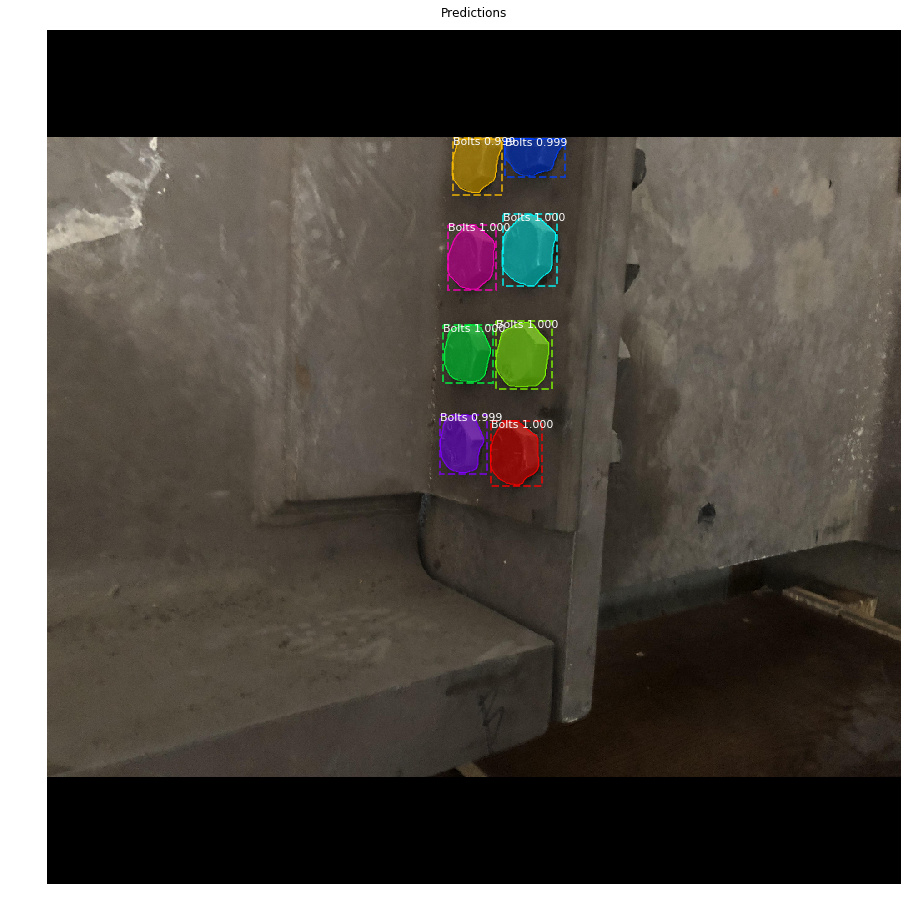

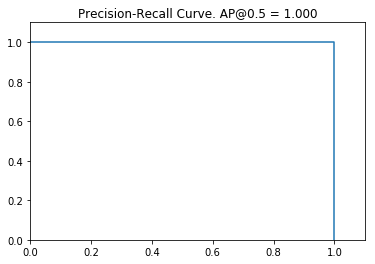

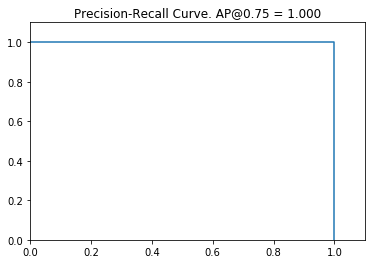

In [5]:
"""Run prediction"""
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]


# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

"""Evaluate Accuracy"""
# Draw precision-recall curve, AP_0.5
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'],
                                          iou_threshold=0.5)
visualize.plot_precision_recall(AP, precisions, recalls, iou_threshold=0.5)
# Draw precision-recall curve, AP_0.75
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'],
                                          iou_threshold=0.75)
visualize.plot_precision_recall(AP, precisions, recalls, iou_threshold=0.75)


Successful prediction            |  Acceptable prediction
:-------------------------:|:-------------------------:
![](assets/bolt/bolt_predict_good.png) | ![](assets/bolt/bolt_predict_good_2.png)

Successful prediction on unseen image |  Failure prediction on unseen image
:-------------------------:|:-------------------------:
![](assets/bolt/bolt_predict_good_unseen_2.png) | ![](assets/bolt/bolt_predict_good_unseen.png)




In [6]:
"""Get avergage AP"""
list_AP_50 = []
list_AP_75 = []

for i in tqdm(range(12)):
    image_id = i
    image, image_meta, gt_class_id, gt_bbox, gt_mask =modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)

    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    
    AP_50, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                            r['rois'], r['class_ids'], r['scores'], r['masks'],
                                            iou_threshold=0.5)
    AP_75, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                            r['rois'], r['class_ids'], r['scores'], r['masks'],
                                            iou_threshold=0.75)
    list_AP_50.append(AP_50)
    list_AP_75.append(AP_75)

print("AP@.50: {}".format(np.mean(list_AP_50)))
print("AP@.75: {}".format(np.mean(list_AP_75)))


100%|██████████| 12/12 [01:54<00:00,  9.40s/it]

AP@.50: 0.7134351769596825
AP@.75: 0.7030185117417398


## Historical Document Image Segmentation

## Implementation

In [2]:
"""Load modules and path"""
import deep_voronoi.deep_voronoi as voronois

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

VORONOIS_WEIGHTS_PATH = os.path.join(MODEL_DIR, "/voronoi20190421T1126/mask_rcnn_voronoi_0024.h5")


In [3]:
"""Configuration"""
config = voronois.VoronoisConfig()
VORONOIS_DIR = os.path.join(ROOT_DIR, "dataset/hisdoc")

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
TEST_MODE = "inference"


def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [5]:
"""Load dataset"""
dataset = voronois.VoronoisDataset()
dataset.load_voronois(VORONOIS_DIR, "val")
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))


"""Load model"""
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

"""Load weight"""
weights_path = './logs/voronoi20190421T1126/mask_rcnn_voronoi_0024.h5'
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

image 00423488.jpg is added
image 00423339.jpg is added
image 00423463.jpg is added
image 00423477.jpg is added
image 00423332.jpg is added
image 00423130.jpg is added
image 00423469.jpg is added
image 00423481.jpg is added
image 00423484.jpg is added
image 00423451.jpg is added
image 00423486.jpg is added
image 00423344.jpg is added
Images: 12
Classes: ['BG', 'textRegion']
Loading weights  ./logs/voronoi20190421T1126/mask_rcnn_voronoi_0024.h5
Re-starting from epoch 24


Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


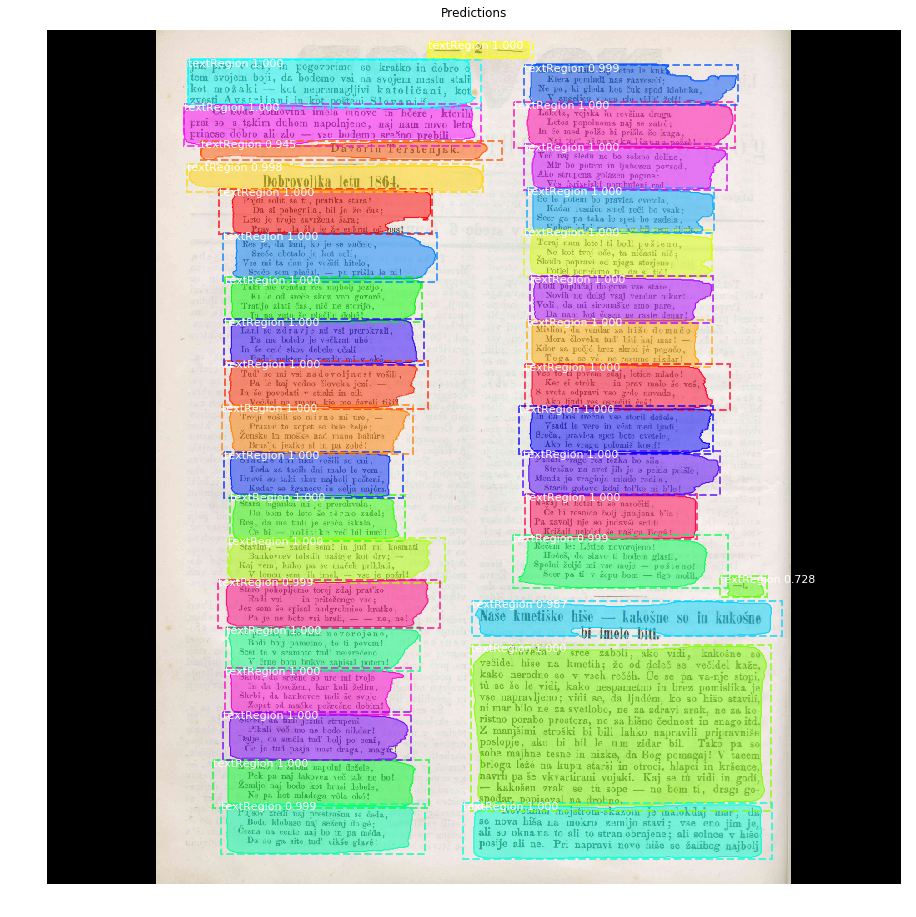

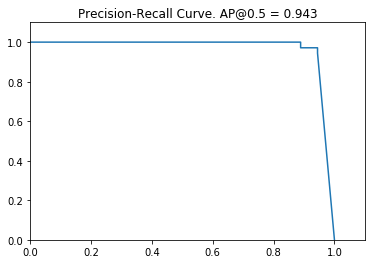

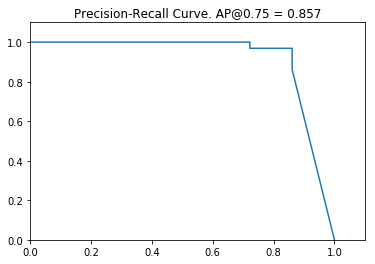

In [6]:
"""Run prediction"""
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]


# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

"""Evaluate Accuracy"""
# Draw precision-recall curve, AP_0.5
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'],
                                          iou_threshold=0.5)
visualize.plot_precision_recall(AP, precisions, recalls, iou_threshold=0.5)
# Draw precision-recall curve, AP_0.75
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'],
                                          iou_threshold=0.75)
visualize.plot_precision_recall(AP, precisions, recalls, iou_threshold=0.75)


### Visualize Prediction

Successful prediction            |  Acceptable prediction
:-------------------------:|:-------------------------:
![](assets/document/document_predict_good.png) | ![](assets/document/document_predict_good_2.png)

Acceptable prediction on unseen image |  Failure prediction on unseen image
:-------------------------:|:-------------------------:
![](assets/document/document_predict_good_unseen.png) | ![](assets/document/document_predict_fail_unseen.png)




In [7]:
"""Get avergage AP"""
list_AP_50 = []
list_AP_75 = []

for i in tqdm(range(12)):
    image_id = i
    image, image_meta, gt_class_id, gt_bbox, gt_mask =modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)

    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    
    AP_50, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                            r['rois'], r['class_ids'], r['scores'], r['masks'],
                                            iou_threshold=0.5)
    AP_75, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                            r['rois'], r['class_ids'], r['scores'], r['masks'],
                                            iou_threshold=0.75)
    list_AP_50.append(AP_50)
    list_AP_75.append(AP_75)

print("AP@.50: {}".format(np.mean(list_AP_50)))
print("AP@.75: {}".format(np.mean(list_AP_75)))


100%|██████████| 12/12 [05:37<00:00, 29.25s/it]

AP@.50: 0.8613782866183654
AP@.75: 0.7117641263915052


***

# <b><u>Conclusion</u></b>



In this study, we explored and fine-tuned a Mask R-CNN model on two datasets from different domains:
- bolt dataset
- historical document image dataset

#### Hyper-parameter tuning
Depends on the dataset, different best hyperparameters are tuned. For the bolt dataset, a model with a learning rate of 0.01 pre-trained on COCO shows the best performance. In the meantime, for the historical document image dataset, a model with a learning rate of 0.01 pre-trained on ImageNet shows the best performance. 

#### Limitation
However, based on the visual inspection on the testing result, both fine-tuned models are still far from practical usage. We believe that this is mainly due to the
- insufficient amount of training data
- lack of augmentation
- class imbalance in training data

#### Future Work
As a future work, we will enlarge our dataset with keeping the balance between classes and perform a further training with various data augmentation technique. 